# Introduction
In Part I, we retrieved our data and took a quick look at it. Turns out that the data wasn't continuous in terms of time, but we'll take what we can get.

Next up, let's explore the dataset with visualizations. Visualizations are useful in understanding the nature of your data and/or identify outliers that may impede modelling.

In this notebook, you will do the following:
1. Import pandas and data vizualization libraries
2. Visualize the column data
    - univariate analysis
    - bivariate analysis
3. Engineer additional features from the data

Useful readings on visualization: 
<a href = "https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed">Introduction to Data Visualization in Python</a> (run it in Incognito Mode if you face the paywall)

It's quite comprehensive and a useful guide for this Part if you're new to visualization.

### Step 1: Import the following libraries
- pandas
- matplotlib.pyplot as plt
- seaborn as sns

In [1]:
# Step 1: Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Read the CSV from Part I
Import the combined CSV that you got from Part I. 

Your DataFrame should have:
- 20,560 rows
- 7 columns

In [3]:
# Step 2: Read the CSV from Part I
df = pd.read_csv('/Users/sm/Desktop/Proj_Room_Occupancy.csv')

## Data visualization
In this Section, we will embark on a series of data visualization to understand the dataset better. 

You can also think of what features might be useful in predicting room occupancy.

The reading at the top will be useful if you're new to visualization.

### Step 3: Plot a pairplot for the DataFrame
This is a relatively small DataFrame, i.e. 7 columns of data, and as such we can use a pairplot to plot multiple correlations and histograms at the same time. 

Plot a pairplot with the DataFrame.

Two things to think about:
- how are the features, i.e. Temperature, Humidity, Light, CO2, Humidity/Ratio, and Occupancy, distributed?
- are there any correlation between features?

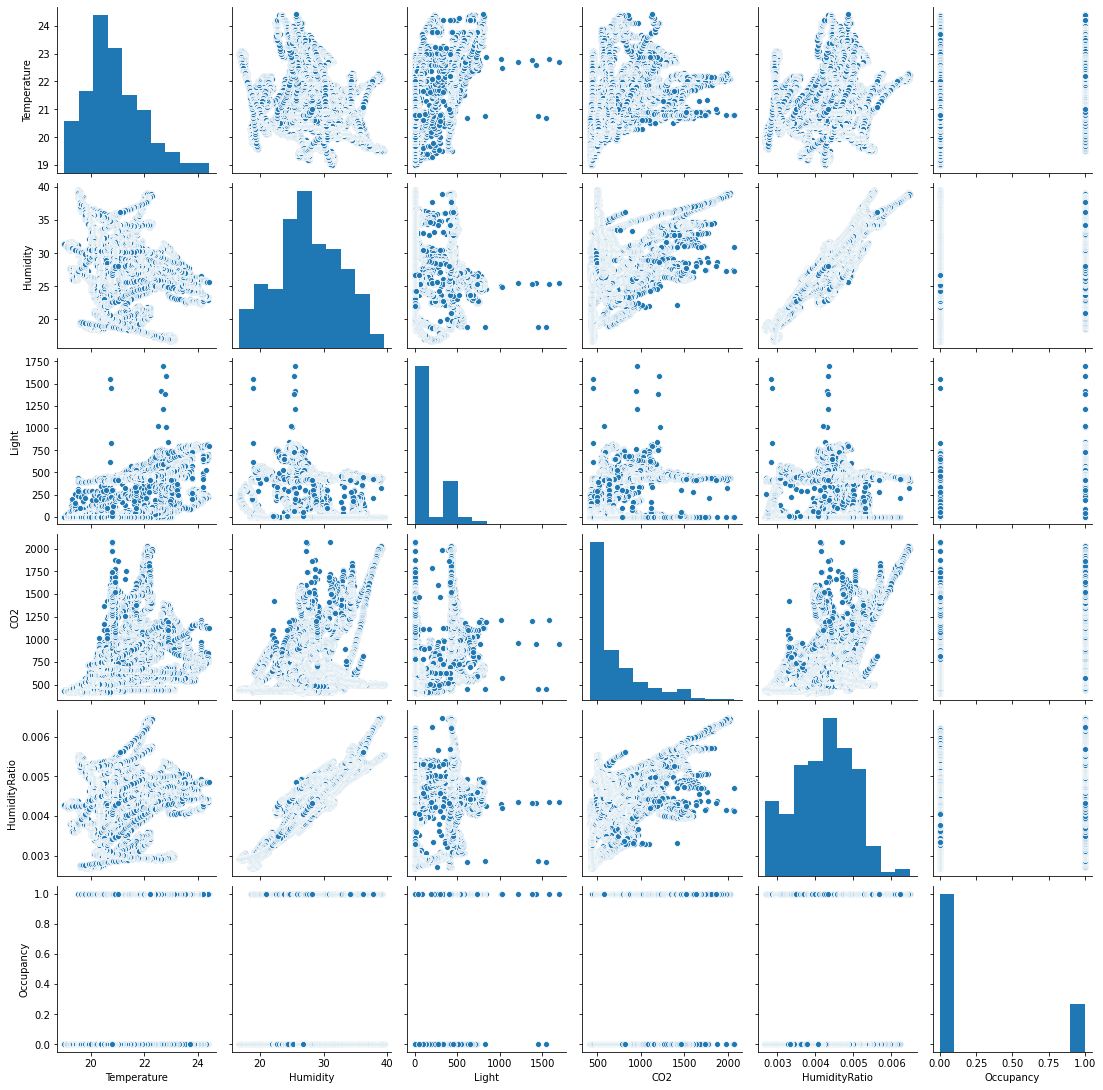

In [4]:
# Step 3: Plot pairplots for the DataFrame
sns.pairplot(df)

### Step 4: Get a correlation matrix for the DataFrame
Use the .corr method to get a correlation matrix for your DataFrame. 

You'll get a 6x6 matrix containing the correlations between the features.

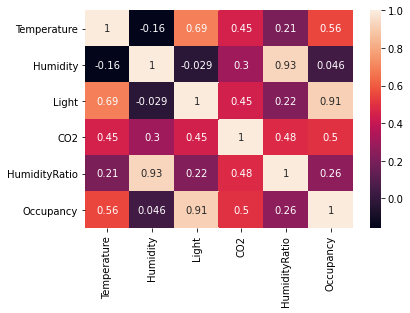

In [5]:
# Step 4: Get a correlation matrix
sns.heatmap(df.corr(), annot=True)

<details>
    <summary><strong>Click once for a hint</strong></summary>
    <div>Google "how to create a correlation matrix using pandas"</div>
</details>

<details>
    <summary><strong>What do you notice about the correlation?</strong></summary>
    <div>It seems like there is a high correlation between "Occupancy" and "Light"</div>
</details>

### Step 5: Plot a countplot on 'Occupancy'
Let's use seaborn and create a counplot on 'Occupancy'. 

This is so that we can see whether our data is imbalanced.

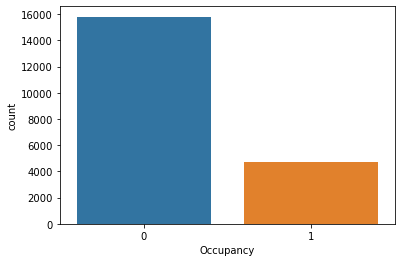

In [7]:
# Step 5: Plot countplot for 'Occupancy'
sns.countplot(x='Occupancy', data=df)

<details>
    <summary><strong>Click once to see what we think</strong></summary>
    <div>It looks like the data is imbalanced, i.e. more 0 than 1, but it is not extremely imbalanced</div>
</details>

### Step 6: Plot 'Temperature' vs 'Occupancy' with a boxplot
Plot 'Temperature' vs 'Occupancy' with a boxplot. 

Let's see if there's any difference in the temperature between a room that is empty and a room that is occupied.

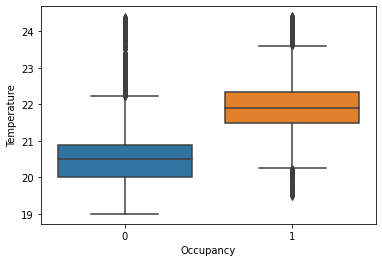

In [9]:
# Step 6: Plot 'Temperature' vs 'Occupancy' with a boxplot
sns.boxplot(x='Occupancy', y='Temperature', data=df)

### Step 7: Plot 'CO2' vs 'Occupancy' with a boxplot
After 'Temperature', we'll plot 'CO2' vs 'Occupancy' with a boxplot to see the temperature levels in a room with and without people.

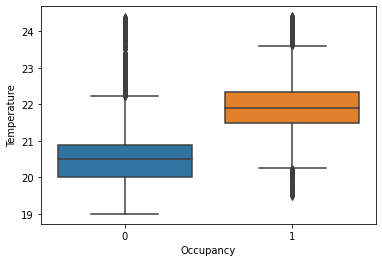

In [10]:
# Step 7: Plot 'CO2' vs 'Occupancy' with a boxplot
sns.boxplot(x='Occupancy', y='Temperature', data=df)

### Step 8: Plot 'Light' vs 'Occupancy' with a boxplot
Let's plot a boxplot, with 'Light' vs 'Occupancy'. 

It's optional, but you can consider not showing outliers by adding a parameter 'showfliers'.

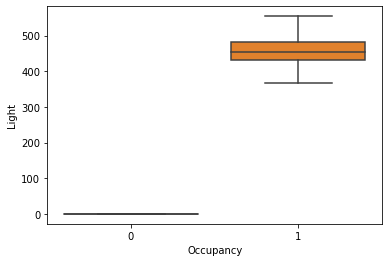

In [13]:
# Step 8: Plot 'Light' vs 'Occupancy' with a boxplot

sns.boxplot(x='Occupancy', y='Light', data=df, showfliers=False)

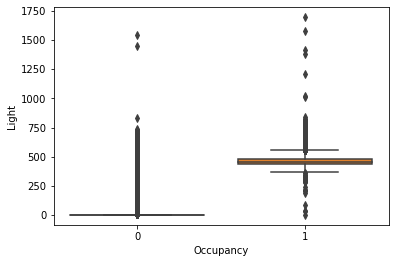

In [14]:
sns.boxplot(x='Occupancy', y='Light', data=df)

## Feature engineering
Before we end off this notebook, we will engineer additional features from our 'date' column.

That is because the 'date' is currently a string, and we can extract time-based information out of it. 

### Step 9: Convert 'date' to a DateTime column
This is the same as Step 6 in the previous Part. 

First convert your 'date' into a column containing DateTime objects. 

In [16]:
# Step 9: Convert 'date' to a DateTime column
df['date']= pd.to_datetime(df['date'])

### Step 10: Create 'weekday' column
Create a column called 'weekday', where it contains the day of the week based on the time, i.e. Monday = 0, Sunday = 6.

<details>
    <summary><strong>Click once for a hint</strong></summary>
    <div>Google "get weekday from date column python"</div>
</details>

In [21]:
# Step 10: Create weekday column
df['weekday'] = df['date'].dt.weekday

### Step 11: Create 'hour' column
Similarly, create a column called "hour", where it is the hour from the 'date' column.

In [26]:
# Step 11: Create 'hour' column
df['hour'] = df['date'].dt.hour

### Step 12: Create 'minute' column
Finally, let's extract the minute information from 'date', and create a column named 'minute'.

In [27]:
# Step 12: Create 'minute' column
df['minute'] = df['date'].dt.minute

In [29]:
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,weekday,hour,minute
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1,0,14,19
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1,0,14,19
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1,0,14,21
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1,0,14,22
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1,0,14,23
...,...,...,...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1,2,9,15
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1,2,9,16
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1,2,9,16
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1,2,9,17


### Step 13: Export the DataFrame as CSV
Now that we're done engineering the DataFrame, let's export it as a CSV so that we can use it in the final Part. 

![FinalDataFrame](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectRoomOccupancy/FinalDataFrame.png)

Your DataFrame should have:
- 20,560 rows
- 10 columns

In [ ]:
# Step 13: Export the engineered DataFrame as CSV 

### End of Part II
There we go, the end of our Part II. In this Part, we:
- explored the data with a pairplot
- created a correlation matrix
- performed visualizations for bivariate analysis
- engineered additional time-based features

In the next Part, we will proceed to machie learning modelling where we will predict whether a room is occupied or otherwise based on the sensor data, and our engineered features. 